# Second

In [3]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding="same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

conv2d_5가 conv2d_4보다 파라미터가 많아보이는 이유?

-> 입력 채널의 개수가 훨씬 많기 때문이다. conv2d_4는 입력 이미지가 하나이지만, conv2d_5는 입력 이미지가 훨씬 많다.

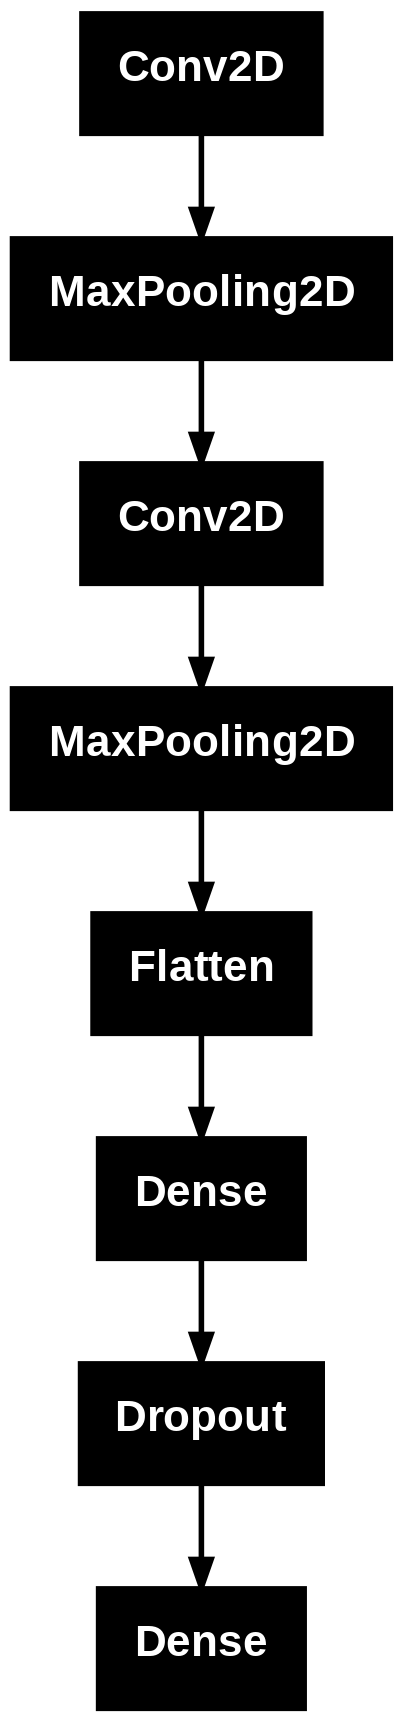

In [5]:
keras.utils.plot_model(model)

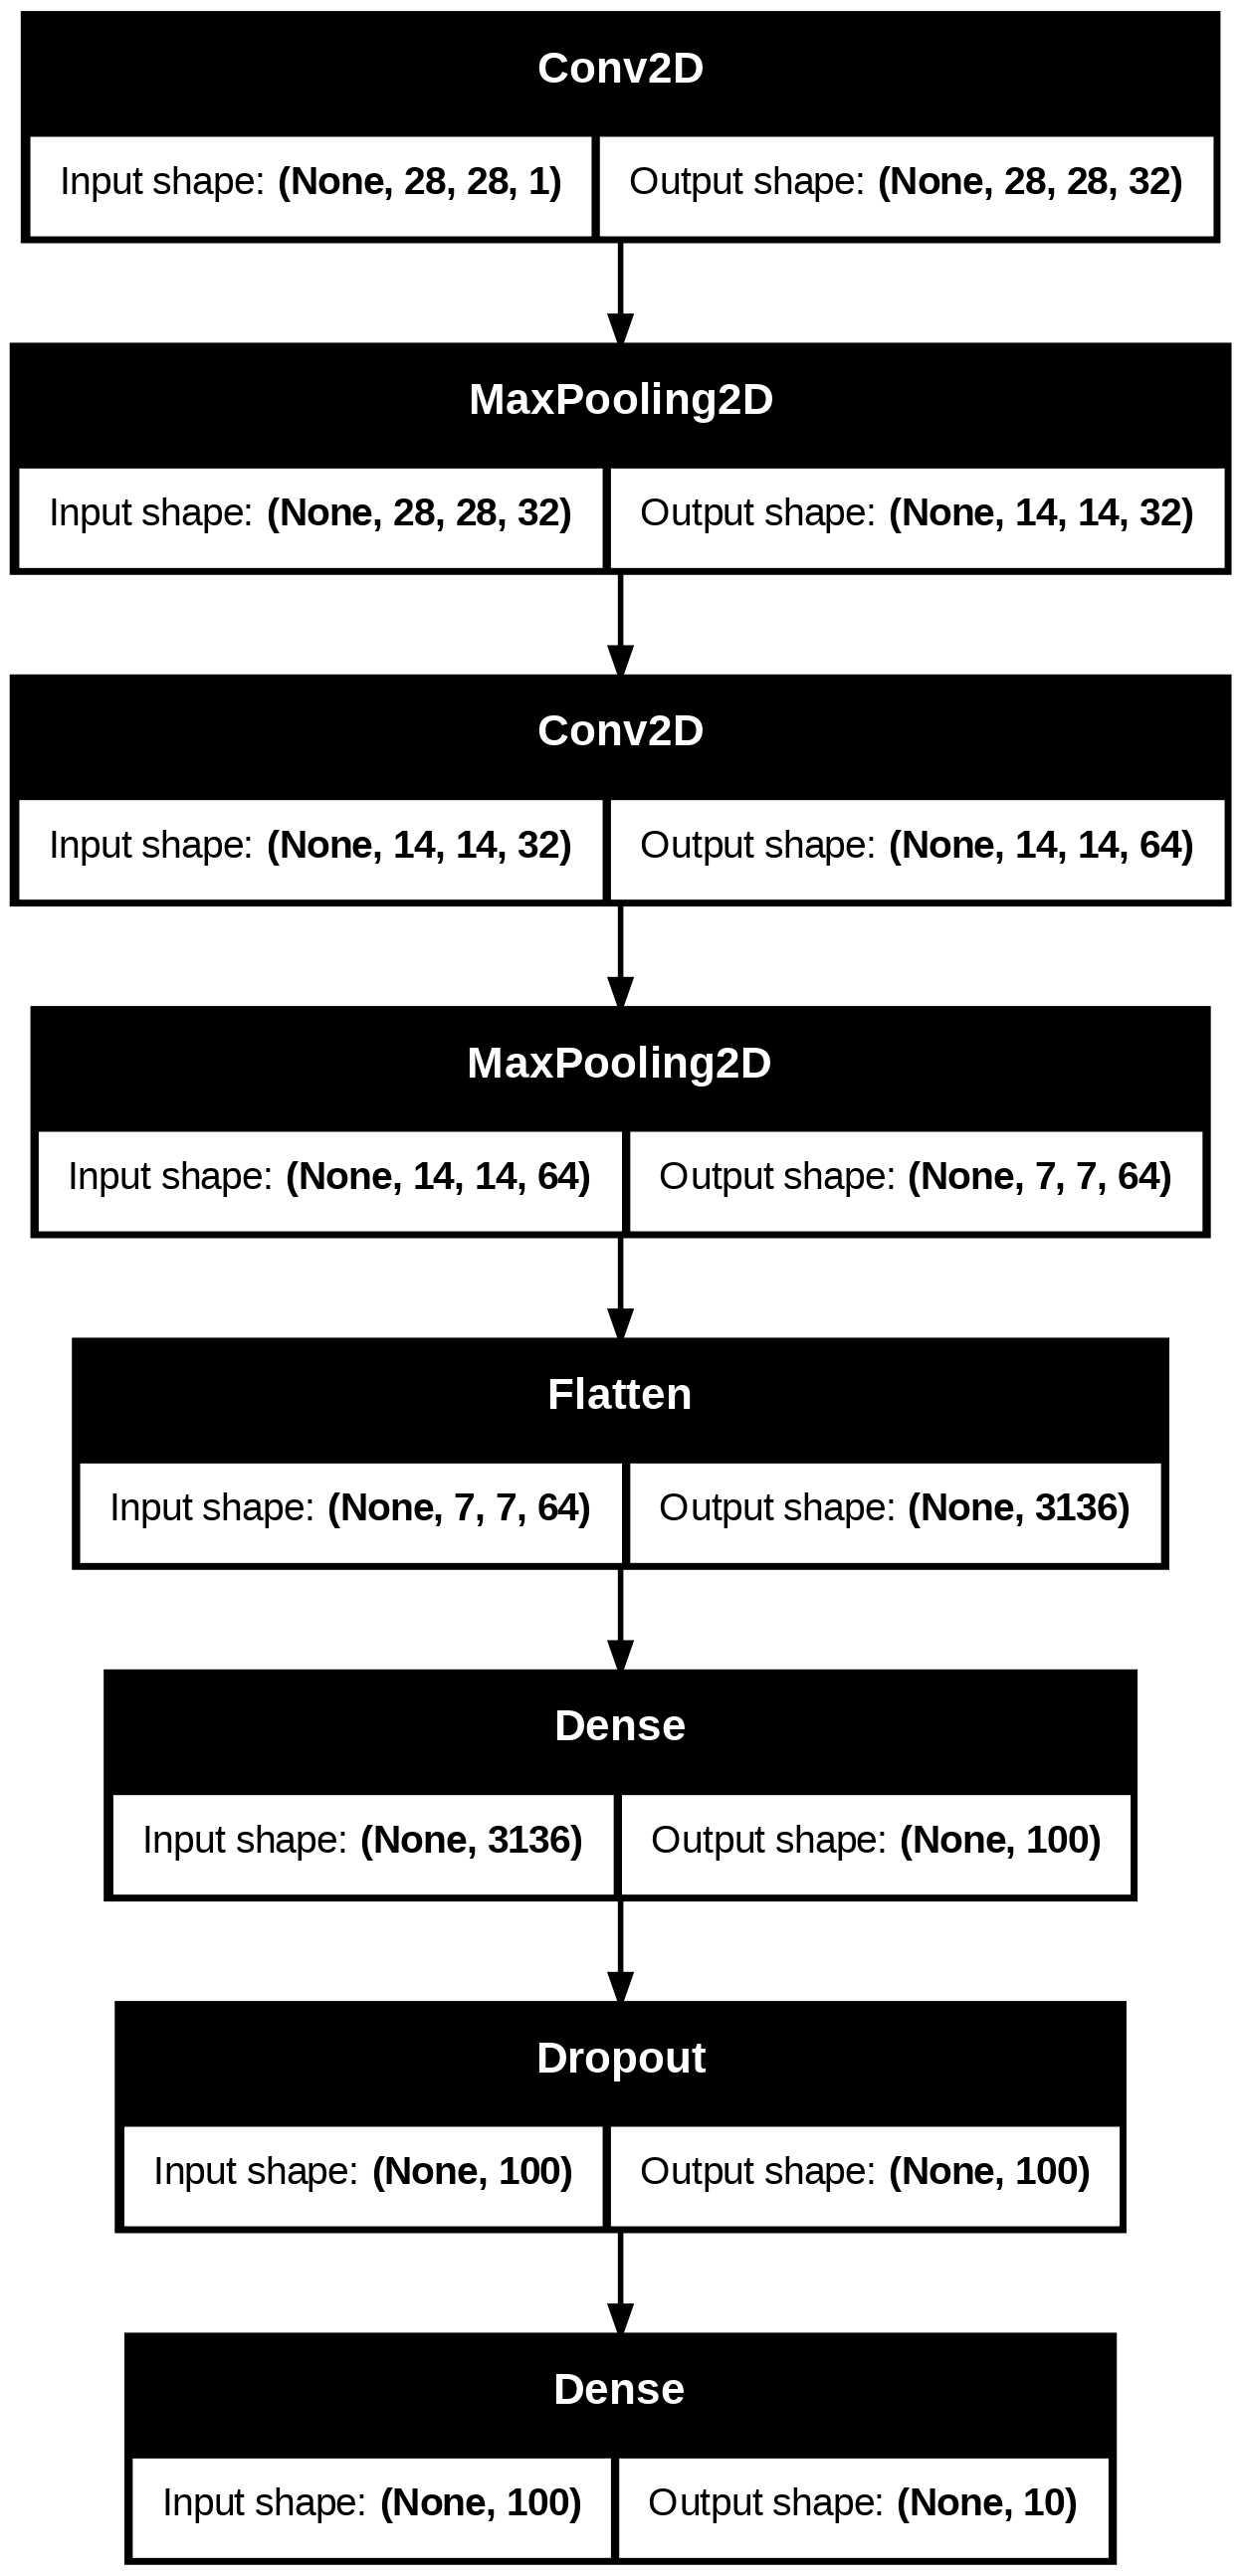

In [6]:
keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7440 - loss: 0.7090 - val_accuracy: 0.8830 - val_loss: 0.3240
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8761 - loss: 0.3468 - val_accuracy: 0.8992 - val_loss: 0.2730
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8959 - loss: 0.2834 - val_accuracy: 0.9071 - val_loss: 0.2510
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9075 - loss: 0.2540 - val_accuracy: 0.9102 - val_loss: 0.2422
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9157 - loss: 0.2275 - val_accuracy: 0.9109 - val_loss: 0.2441
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9264 - loss: 0.2055 - val_accuracy: 0.9146 - val_loss: 0.2337
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9309 - loss: 0.1898 - val_accuracy: 0.9203 - val_loss: 0.2169
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9358 - loss: 0.1748 -

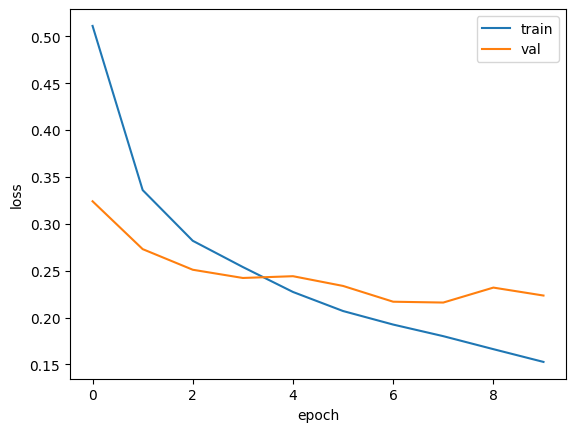

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [9]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9217 - loss: 0.2123


[0.2160240262746811, 0.9206666946411133]

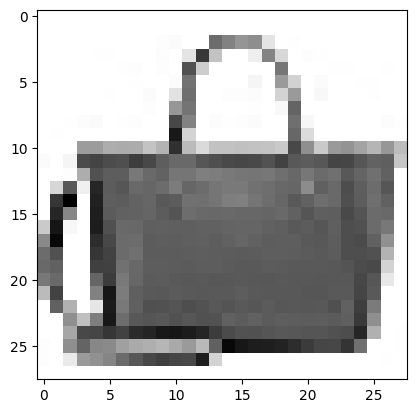

In [10]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap="gray_r")
plt.show()

In [11]:
preds = model.predict(val_scaled[0:1])
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


array([[6.7468457e-18, 3.8156219e-30, 6.8620553e-21, 1.4159634e-20,
        2.6329519e-22, 3.3829958e-22, 7.9765245e-17, 2.0457341e-20,
        1.0000000e+00, 1.4808583e-19]], dtype=float32)

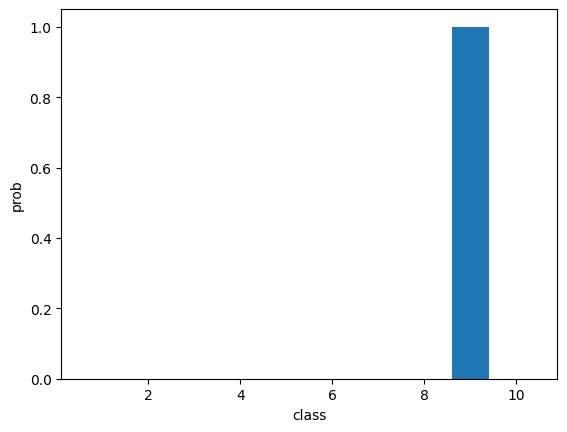

In [12]:
plt.bar(range(1, 11), preds[0])
plt.xlabel("class")
plt.ylabel("prob")
plt.show()

In [13]:
import numpy as np

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
classes[np.argmax(preds)]

'가방'

In [14]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9129 - loss: 0.2401


[0.23545558750629425, 0.9146000146865845]

test 데이터는 항상 마지막에 평가해야 한다. validation도 어쨌든 early_stopping에 썼기 때문에 어느정도 오염됐다고 봐야한다.

## PyTorch

In [15]:
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root=".", train=True, download=True)
fm_test = FashionMNIST(root=".", train=True, download=True)

train_input = fm_train.data
train_target = fm_train.targets
train_scaled = train_input.reshape(-1, 1, 28, 28) / 255.

from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

100%|██████████| 26.4M/26.4M [00:14<00:00, 1.87MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 188kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.88MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.4MB/s]


In [16]:
import torch.nn as nn

model = nn.Sequential()
model.add_module("conv1", nn.Conv2d(1, 32, kernel_size=3, padding="same"))
model.add_module("relu1", nn.ReLU())
model.add_module("pool1", nn.MaxPool2d(2))

In [17]:
model.add_module("conv2", nn.Conv2d(32, 64, kernel_size=3, padding="same"))
model.add_module("relu2", nn.ReLU())
model.add_module("pool2", nn.MaxPool2d(2))
model.add_module("flatten", nn.Flatten())

In [18]:
import torch
outputs_test = model(torch.ones(1, 1, 28, 28))
outputs_test.shape

torch.Size([1, 3136])

fake data를 하나 통과시켜서 Flatten 결과를 peek해보기

In [19]:
model.add_module("dense1", nn.Linear(3136, 100))
model.add_module("relu3", nn.ReLU())
model.add_module("dropout", nn.Dropout(0.3))
model.add_module("dense2", nn.Linear(100, 10))

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cuda')

In [21]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [22]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train_scaled, train_target)
val_dataset = TensorDataset(val_scaled, val_target)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [23]:
train_hist = []
val_hist = []
patience = 2
best_loss = -1
early_stopping_counter = 0

epochs = 20
for epoch in range(epochs):
  model.train()
  train_loss = 0
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  model.eval()
  val_loss = 0
  with torch.no_grad():
    for inputs, targets in val_loader: # 예전엔 validation데이터를 한번에 넣었음
      # 그렇게 하면 validation data가 커지면 메모리 이슈가 터짐.
      # 이번엔 batch단위로 올림.
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      val_loss += loss.item()

  train_loss = train_loss / len(train_loader)
  val_loss = val_loss / len(val_loader)
  train_hist.append(train_loss)
  val_hist.append(val_loss)
  print(f"[epoch]: {epoch+1}, [train loss]: {train_loss:.4f}, [val loss]: {val_loss:.4f}")
  if best_loss == -1 or val_loss < best_loss:
    best_loss = val_loss
    early_stopping_counter = 0
    torch.save(model.state_dict(), "best_cnn_model.pt")
  else:
    early_stopping_counter += 1
  if early_stopping_counter >= patience:
    print(f"Early stopping at epoch {epoch+1}")
    break

[epoch]: 1, [train loss]: 0.5122, [val loss]: 0.3376
[epoch]: 2, [train loss]: 0.3284, [val loss]: 0.2798
[epoch]: 3, [train loss]: 0.2776, [val loss]: 0.2473
[epoch]: 4, [train loss]: 0.2469, [val loss]: 0.2281
[epoch]: 5, [train loss]: 0.2202, [val loss]: 0.2244
[epoch]: 6, [train loss]: 0.2005, [val loss]: 0.2134
[epoch]: 7, [train loss]: 0.1836, [val loss]: 0.2240
[epoch]: 8, [train loss]: 0.1651, [val loss]: 0.2197
Early stopping at epoch 8


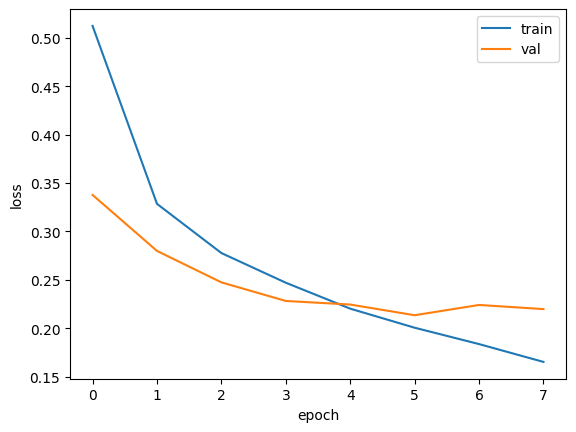

In [24]:
import matplotlib.pyplot as plt

plt.plot(train_hist, label="train")
plt.plot(val_hist, label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [25]:
model.load_state_dict(torch.load("best_cnn_model.pt", weights_only=True))

model.eval()
corrects = 0
with torch.no_grad():
  for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    predicts = torch.argmax(outputs, 1)
    corrects += (predicts == targets).sum().item()
accuracy = corrects / len(val_dataset)
print(f"validation accuracy : {accuracy:.4f}")

validation accuracy : 0.9209


# Third

In [27]:
import keras
model = keras.models.load_model("best-cnn-model.keras")
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [29]:
conv = model.layers[0]
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

Shape가 왜 저 모양으로 나오는가? -> 메모리에서 불러오는 비용을 최소화 하기 위해서이다.

Convolution 연산은 이미지 내부 접근이 중요한게 아니라 깊이 접근이 중요해서 깊이가 가장 뒤에 있어야 캐싱을 최대한 이용할 수 있다.

In [30]:
conv_weights = conv.weights[0].numpy()
conv_weights.mean(), conv_weights.std()

(np.float32(-0.031712882), np.float32(0.24306372))

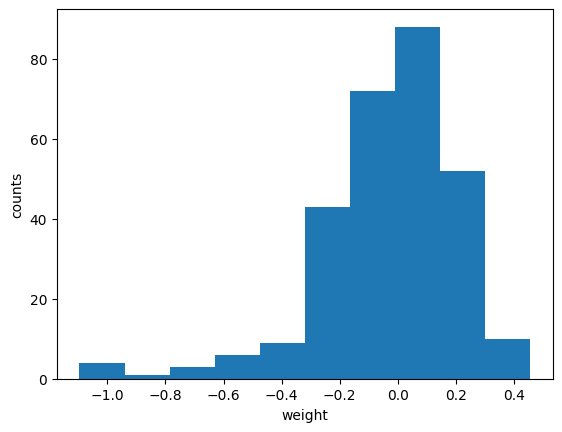

In [31]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("counts")
plt.show()

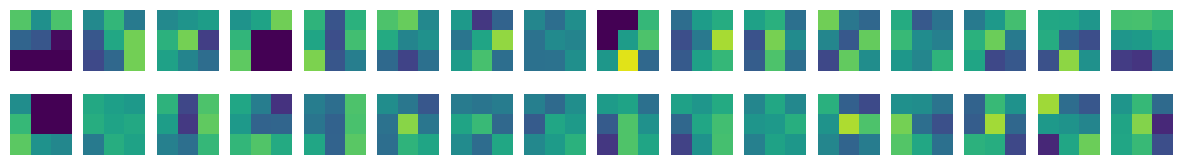

In [33]:
fig, ax = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    ax[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    ax[i, j].axis("off")
plt.show()

In [34]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28, 28, 1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3,
                                          activation="relu", padding="same"))

In [35]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [36]:
no_training_weights = no_training_conv.weights[0].numpy()
no_training_weights.mean(), no_training_weights.std()

(np.float32(0.0018019216), np.float32(0.081914686))

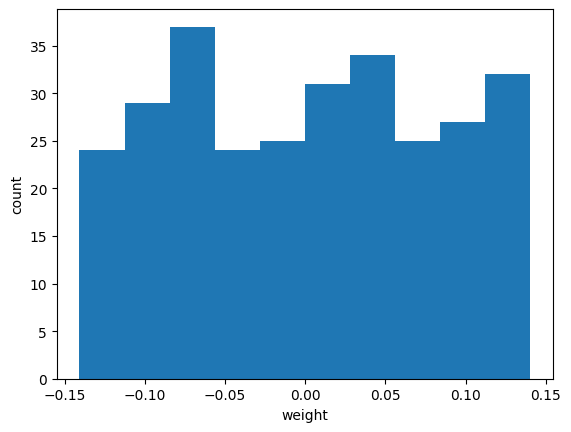

In [38]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

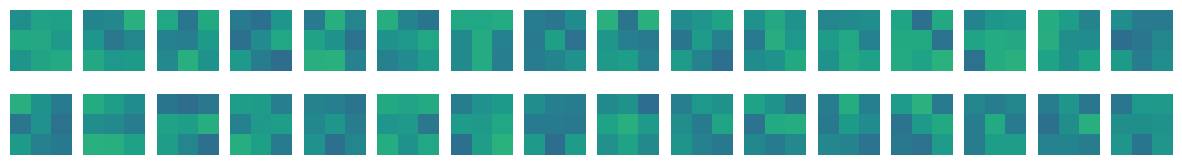

In [39]:
fig, ax = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    ax[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    ax[i, j].axis("off")
plt.show()

## Functional API

In [40]:
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation="relu")
dense2 = keras.layers.Dense(10, activation="softmax")

In [42]:
hidden = dense1(inputs)
outputs = dense2(hidden)
func_model = keras.Model(inputs, outputs)

In [43]:
model.inputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>]

In [44]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

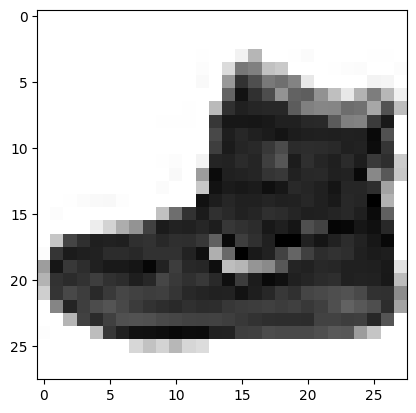

In [45]:
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap="gray_r")
plt.show()

In [46]:
ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1) / 255.
feature_maps = conv_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


In [49]:
feature_maps.shape

(1, 28, 28, 32)

In [50]:
conv_acti_np = conv_acti.weights[0].numpy()

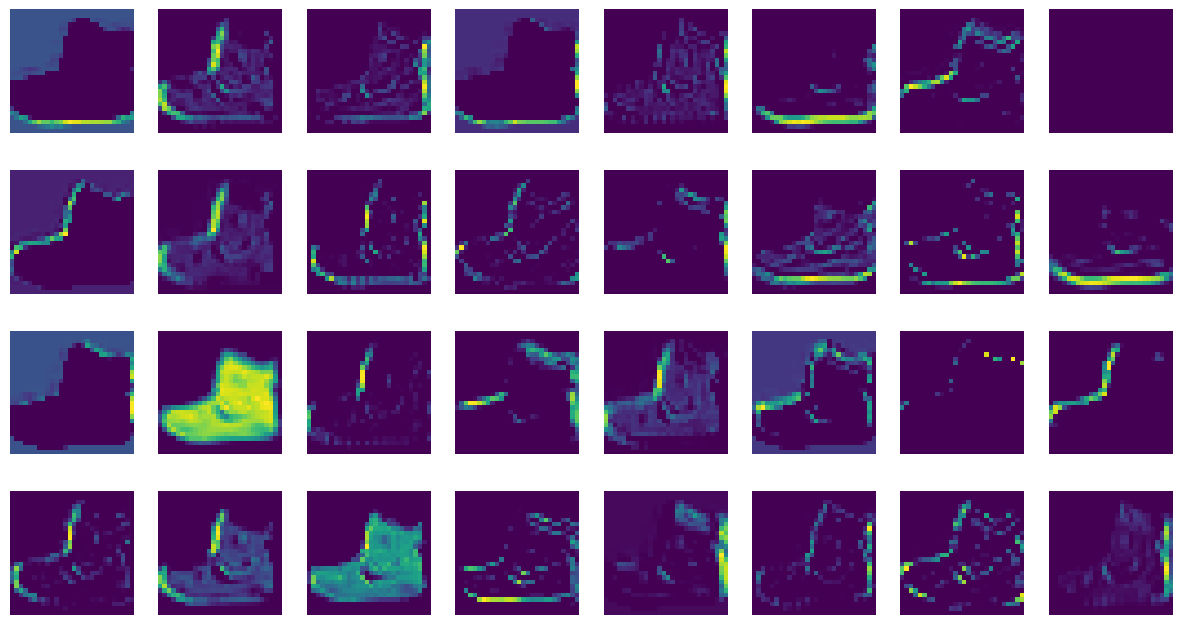

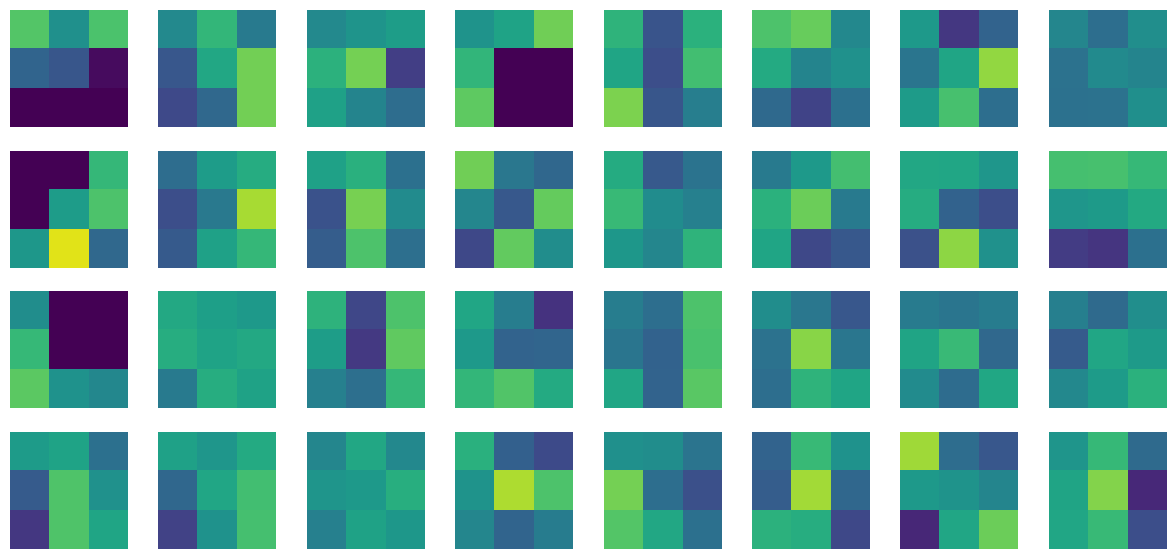

In [54]:
fig, ax = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    ax[i, j].imshow(feature_maps[0,:,:,i*8+j])
    ax[i, j].axis("off")
plt.show()

fig, ax = plt.subplots(4, 8, figsize=(15, 7))
for i in range(4):
  for j in range(8):
    ax[i, j].imshow(conv_acti_np[:,:,0,i*8+j], vmin=-0.5, vmax=0.5)
    ax[i, j].axis("off")
plt.show()

In [56]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)
feature_maps = conv2_acti.predict(ankle_boot)
feature_maps.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


(1, 14, 14, 64)

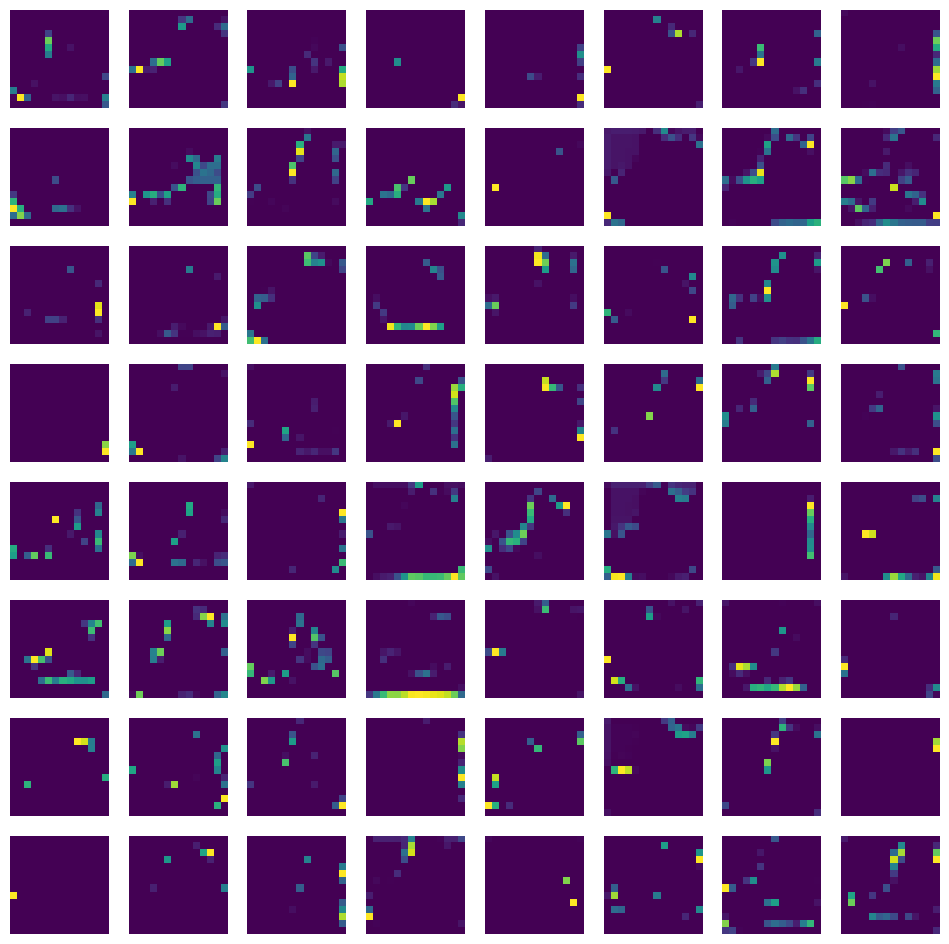

In [58]:
fig, ax = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    ax[i, j].imshow(feature_maps[0,:,:,i*8+j])
    ax[i, j].axis("off")
plt.show()

Spatial 정보는 없어지지 않는다. (커널이 찍는 위치가 정해져 있어서)

하지만, 새로운 패턴들을 찾기에 층이 깊어지면 점점 고차원적 특징을 찾음.

In [60]:
!wget https://bit.ly/3DQeEH8 -O best_cnn_model.pt

--2025-11-20 05:05:21--  https://bit.ly/3DQeEH8
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl2/raw/refs/heads/main/best_cnn_model.pt [following]
--2025-11-20 05:05:21--  https://github.com/rickiepark/hg-mldl2/raw/refs/heads/main/best_cnn_model.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl2/refs/heads/main/best_cnn_model.pt [following]
--2025-11-20 05:05:21--  https://raw.githubusercontent.com/rickiepark/hg-mldl2/refs/heads/main/best_cnn_model.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.gith

In [87]:
import torch.nn as nn
model = nn.Sequential()
model.add_module("conv1", nn.Conv2d(1, 32, kernel_size=3, padding="same"))
model.add_module("relu1", nn.ReLU())
model.add_module("pool1", nn.MaxPool2d(2))
model.add_module("conv2", nn.Conv2d(32, 64, kernel_size=3, padding="same"))
model.add_module("relu2", nn.ReLU())
model.add_module("pool2", nn.MaxPool2d(2))
model.add_module("flatten", nn.Flatten())
model.add_module("dense1", nn.Linear(3136, 100))
model.add_module("relu3", nn.ReLU())
model.add_module("dropout", nn.Dropout(0.3))
model.add_module("dense2", nn.Linear(100, 10))

In [88]:
model.load_state_dict(torch.load("best_cnn_model.pt", weights_only=True))

<All keys matched successfully>

In [89]:
layers = [layer for layer in model.children()]
layers[0], model[0]

(Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same),
 Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same))

In [90]:
for name, layer in model.named_children():
  print(f"{name:8s}: {layer}")

conv1   : Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
relu1   : ReLU()
pool1   : MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
conv2   : Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
relu2   : ReLU()
pool2   : MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
flatten : Flatten(start_dim=1, end_dim=-1)
dense1  : Linear(in_features=3136, out_features=100, bias=True)
relu3   : ReLU()
dropout : Dropout(p=0.3, inplace=False)
dense2  : Linear(in_features=100, out_features=10, bias=True)


In [91]:
model.conv1

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [92]:
conv_weights = model.conv1.weight.data
conv_weights.mean(), conv_weights.std()

(tensor(-0.0550), tensor(0.3589))

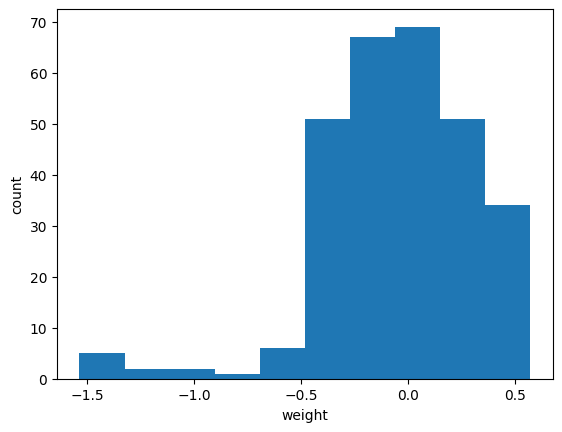

In [93]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

In [94]:
conv_weights.shape # keras와 달리 추상화가 잘 되어있어서 쓰기 편함

torch.Size([32, 1, 3, 3])

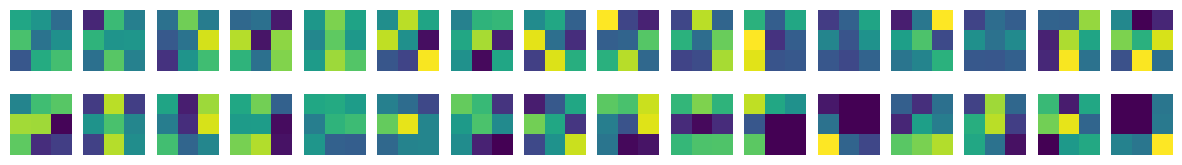

In [95]:
fig, ax = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    ax[i, j].imshow(conv_weights[i*16+j, 0, :, :], vmin=-0.5, vmax=0.5)
    ax[i, j].axis("off")
plt.show()

In [96]:
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root=".", train=True, download=True)
train_input = fm_train.data

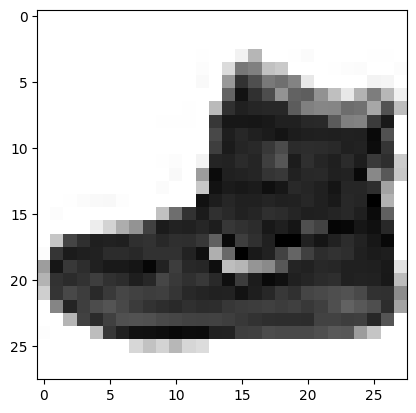

In [97]:
plt.imshow(train_input[0], cmap="gray_r")
plt.show()

In [98]:
ankle_boot = train_input[0:1].reshape(1, 1, 28, 28)/255.

model.eval()
with torch.no_grad():
  feature_maps = model.conv1(ankle_boot)
  feature_maps = model.relu1(feature_maps)

In [99]:
feature_maps.shape

torch.Size([1, 32, 28, 28])

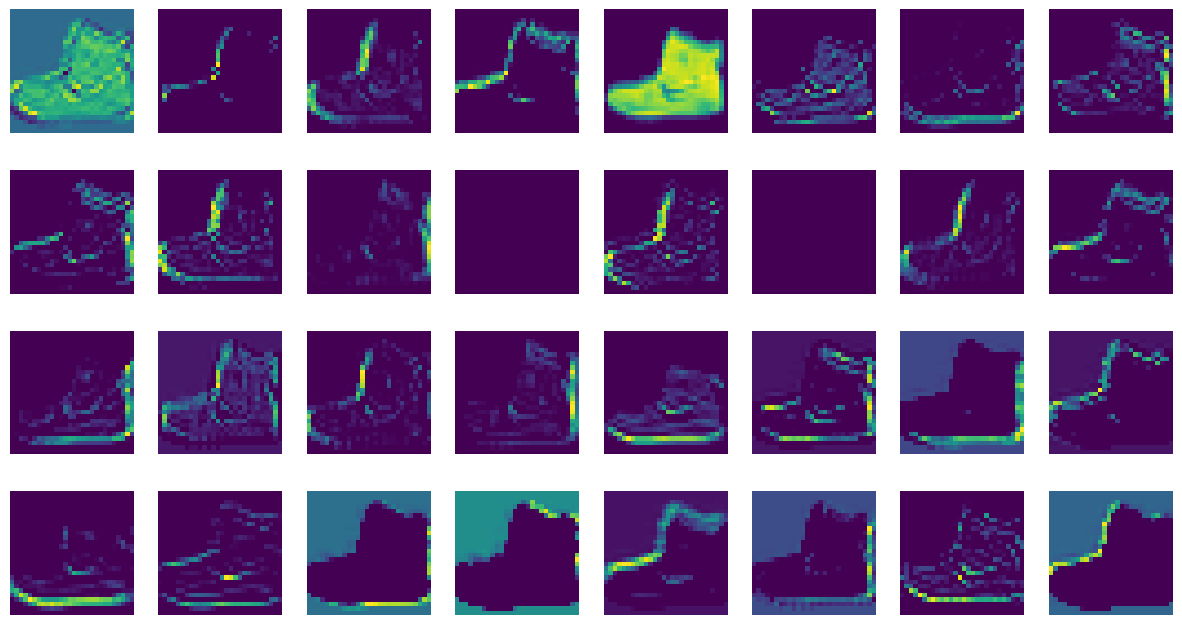

In [100]:
fig, ax = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    ax[i, j].imshow(feature_maps[0, i*8+j, :, :])
    ax[i, j].axis("off")
plt.show()

In [101]:
model.eval()
x = ankle_boot
with torch.no_grad():
  for name, layer in model.named_children():
    x = layer(x)
    if name == "relu2":
      break
feature_maps = x

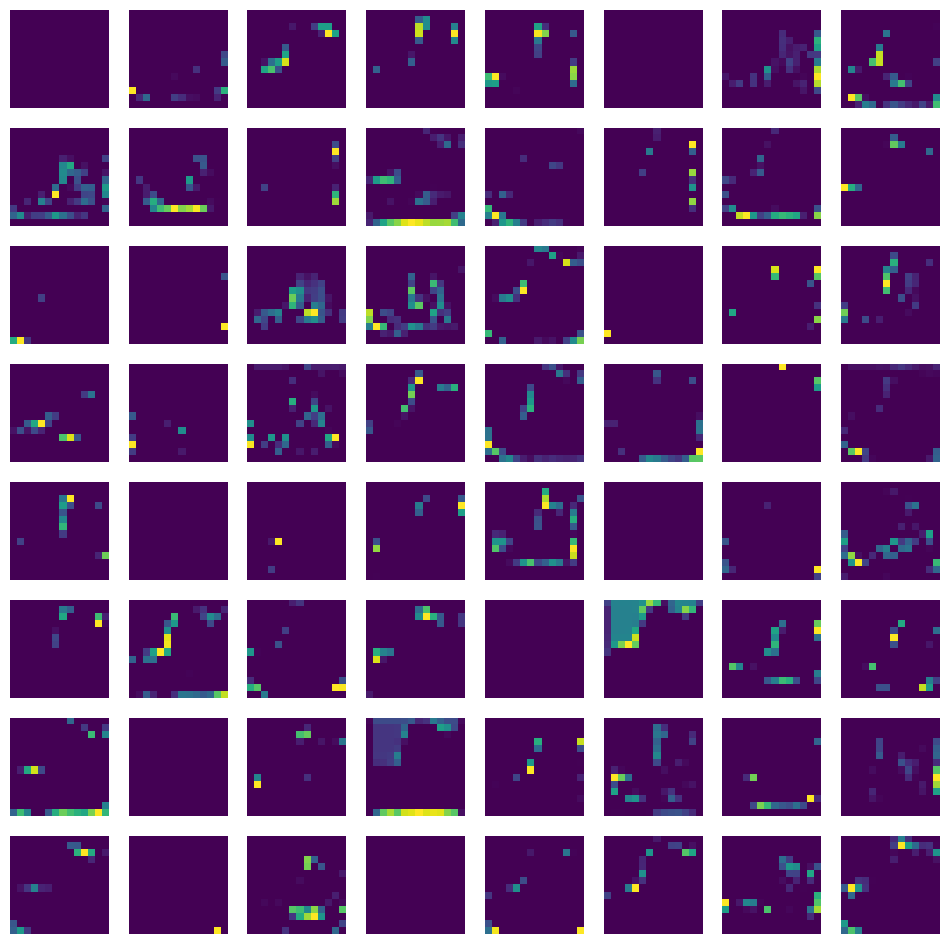

In [103]:
fig, ax = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    ax[i, j].imshow(feature_maps[0, i*8+j, :, :])
    ax[i, j].axis("off")
plt.show()

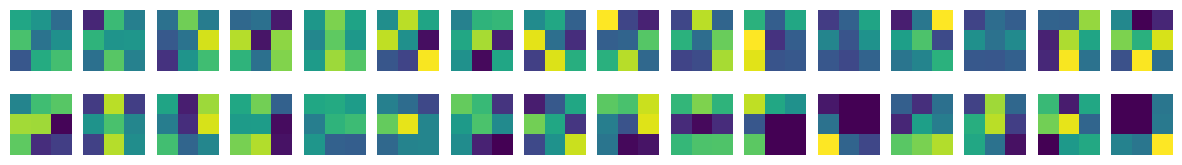

In [106]:
conv1_np = model.conv1.weight.detach().numpy()
fig, ax = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    ax[i, j].imshow(conv1_np[16*i+j,0,:,:], vmin=-0.5, vmax=0.5)
    ax[i, j].axis("off")
plt.show()